### Importing Necessary Libraries to begin with

In [1]:
#Importing necessary Libraries to begin with
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

### Reading the data file

In [3]:
#creating a df named bike & storing the data in it

bike= pd.read_csv('day.csv')
bike.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Doing some routine checks 

In [4]:
bike.shape

(730, 16)

In [5]:
#code to increase the no of visible columns on the screen, if more columns are added later in the process.

pd.set_option('display.max_columns', 40) 

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
'We can see that there is no null value present in the dataframe'

'We can see that there is no null value present in the dataframe'

In [8]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Reason for dropping the following variables.
- Instant is a index column which has no usefull information to predict anything about target variable.
- Dropping dteday column as we have yr, month & weekday column separately.
- Dropping casual & registered as the total count which is our target variable matters more(buisness relevance).

In [9]:
# Dropping the redundant or less useful variables.

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Mapping the categorical variables
- season
- mnth
- weekday
- weathersit

In [10]:
bike['season']=bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['mnth']=bike.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike['weekday']=bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike['weathersit']=bike.weathersit.map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,1,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


### Data Visualization

##### Categorical Variables vs Bike rentals

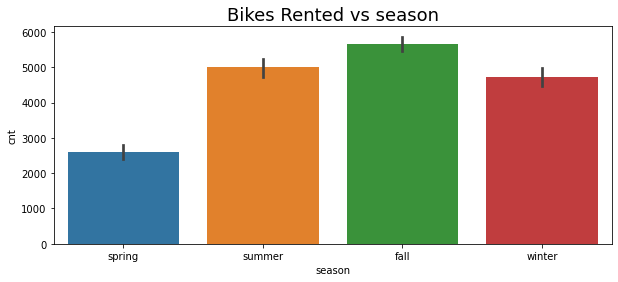

In [11]:
#Plotting count of total bike rentals vs season

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs season',fontsize=18)
sns.barplot(x='season',y='cnt',data=bike)
plt.show()

In [12]:
'highest no of bike rentals are observed in the fall & lowest in tge spring'

'highest no of bike rentals are observed in the fall & lowest in tge spring'

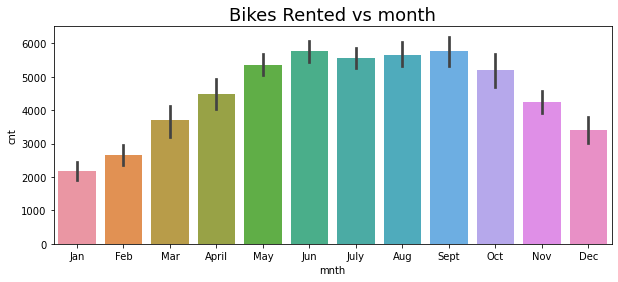

In [13]:
#Plotting count of total bike rentals vs month

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs month',fontsize=18)
sns.barplot(x='mnth',y='cnt',data=bike)
plt.show()

In [14]:
'we can observe that the bike rentals are more around the mid of the year, highest being in the month of June & September. The lowest bike rentals are in the month of January'

'we can observe that the bike rentals are more around the mid of the year, highest being in the month of June & September. The lowest bike rentals are in the month of January'

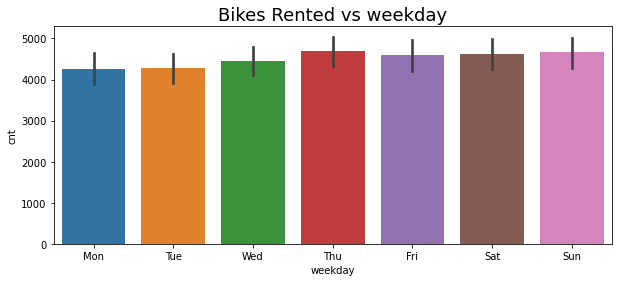

In [15]:
#Plotting count of total bike rentals vs weekday

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs weekday',fontsize=18)
sns.barplot(x='weekday',y='cnt',data=bike)
plt.show()

In [16]:
'Almost everyday have near about the same no of bike rentals, highest being on Thursday & Sunday'

'Almost everyday have near about the same no of bike rentals, highest being on Thursday & Sunday'

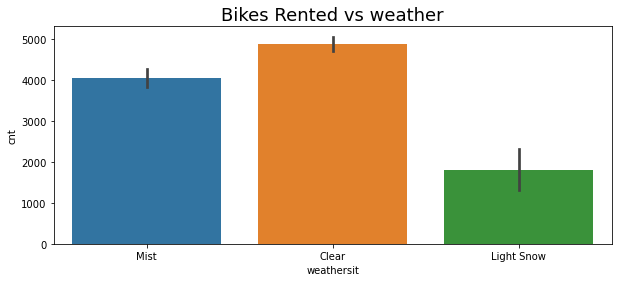

In [17]:
#Plotting count of total bike rentals vs weather

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs weather',fontsize=18)
sns.barplot(x='weathersit',y='cnt',data=bike)
plt.show()

In [18]:
'On days with clear weather bike rentals are the highest, while we see no bike rentals during heavy rain'

'On days with clear weather bike rentals are the highest, while we see no bike rentals during heavy rain'

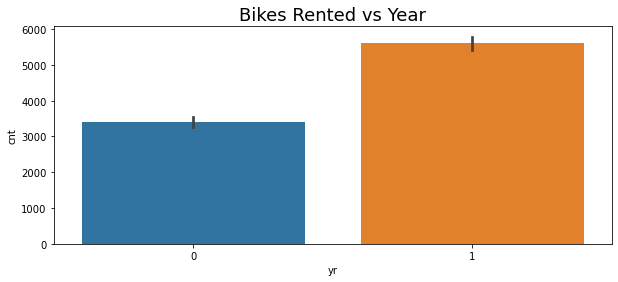

In [19]:
#Plotting count of total bike rentals vs year 

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs Year',fontsize=18)
sns.barplot(x='yr',y='cnt',data=bike)
plt.show()

In [20]:
'0 represents year 2018 & 1 represents year 2019. so we can see that bike rentals are more in year 2019'

'0 represents year 2018 & 1 represents year 2019. so we can see that bike rentals are more in year 2019'

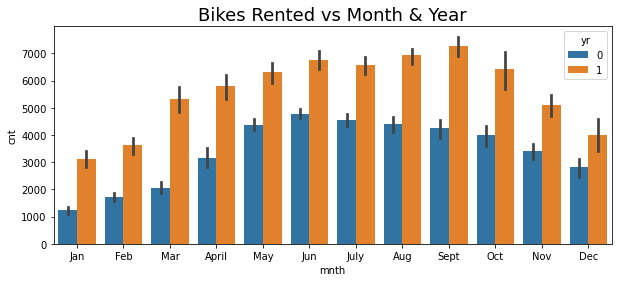

In [21]:
#Plotting count of total bike rentals vs month & year 

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs Month & Year',fontsize=18)
sns.barplot('mnth','cnt',hue='yr',data=bike)
plt.show()

In [22]:
'Bike rentals is highest in the month of June for year 2018 & September for year 2019'

'Bike rentals is highest in the month of June for year 2018 & September for year 2019'

##### Continuous variables vs Bike rentals

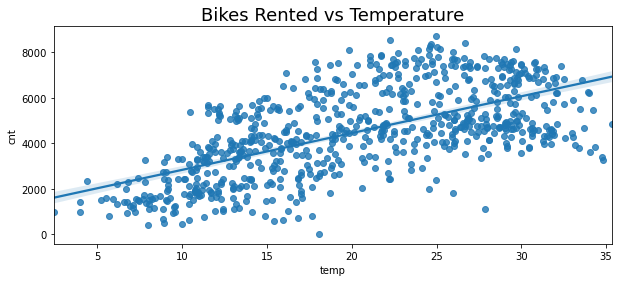

In [23]:
#Total bike rentals vs Temperature

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs Temperature',fontsize=18)
sns.regplot(x='temp',y='cnt' ,data=bike)
plt.show()

In [24]:
'Bike rentals are higher at higher temperature'

'Bike rentals are higher at higher temperature'

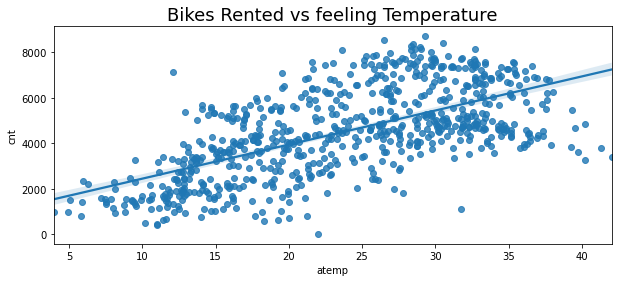

In [25]:
#Total bike rentals vs feeling Temperature

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs feeling Temperature',fontsize=18)
sns.regplot(x='atemp',y='cnt' ,data=bike)
plt.show()

In [26]:
'Bike rentals are higher at higher feeling like temperatures. Also we see a increase in bike rentals with increase in temperature'

'Bike rentals are higher at higher feeling like temperatures. Also we see a increase in bike rentals with increase in temperature'

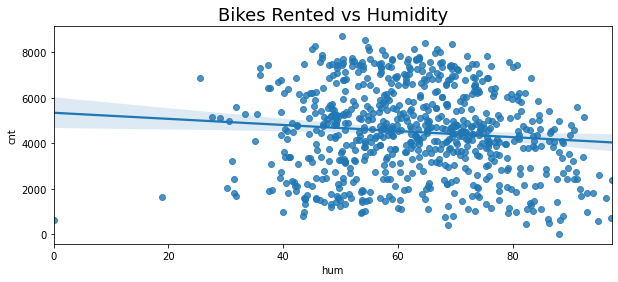

In [27]:
#Total bike rentals vs Humidity

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs Humidity',fontsize=18)
sns.regplot(x='hum',y='cnt' ,data=bike)
plt.show()

In [28]:
'Bike rentals reduce with rise in humidity'

'Bike rentals reduce with rise in humidity'

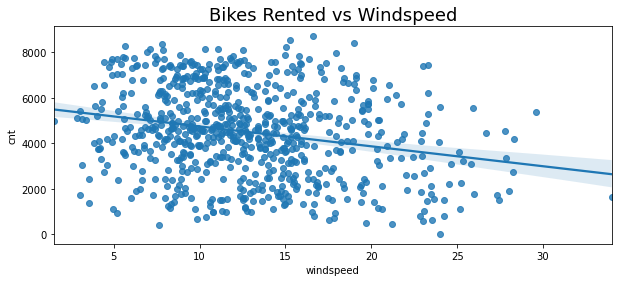

In [29]:
#Total bike rentals vs Windspeed

plt.figure(figsize=[10,4])
plt.title('Bikes Rented vs Windspeed',fontsize=18)
sns.regplot(x='windspeed',y='cnt' ,data=bike)
plt.show()

In [30]:
'Bike rentals are higher at low windspeed & rentals reduce with rise in windspeed'

'Bike rentals are higher at low windspeed & rentals reduce with rise in windspeed'

##### Visualising relation betwen continous variables using pairplot

<Figure size 720x288 with 0 Axes>

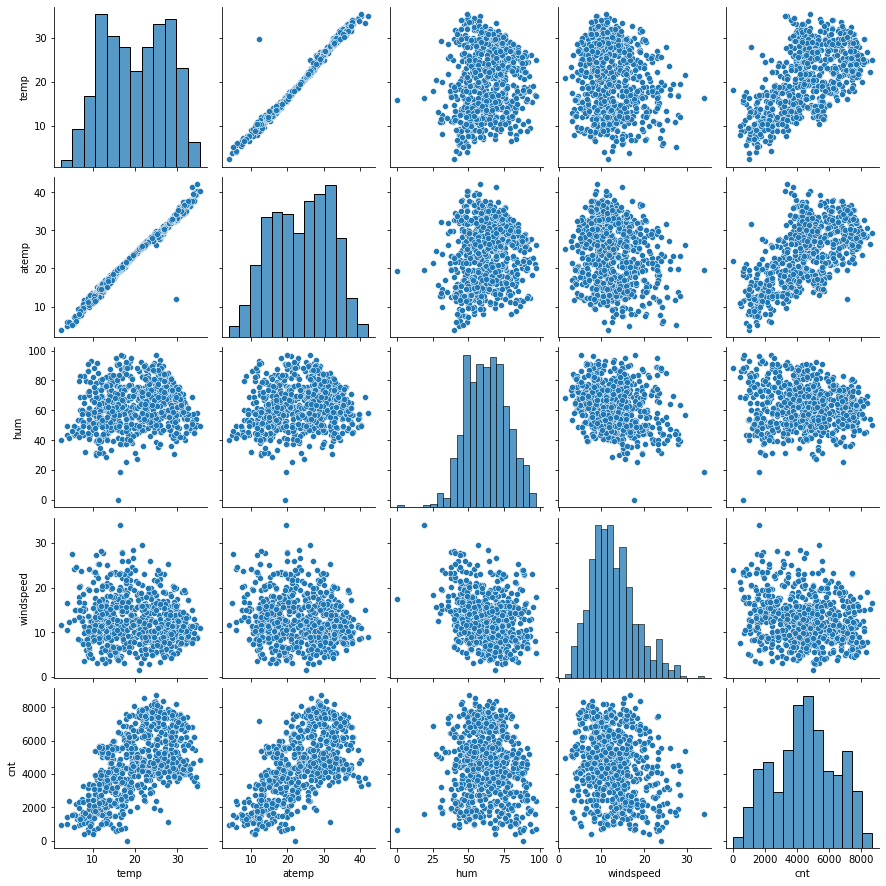

In [31]:
#Pairplot for numeric variables

plt.figure(figsize=[10,4])
sns.pairplot(bike, vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

##### Heatmap to observe correlation between variables

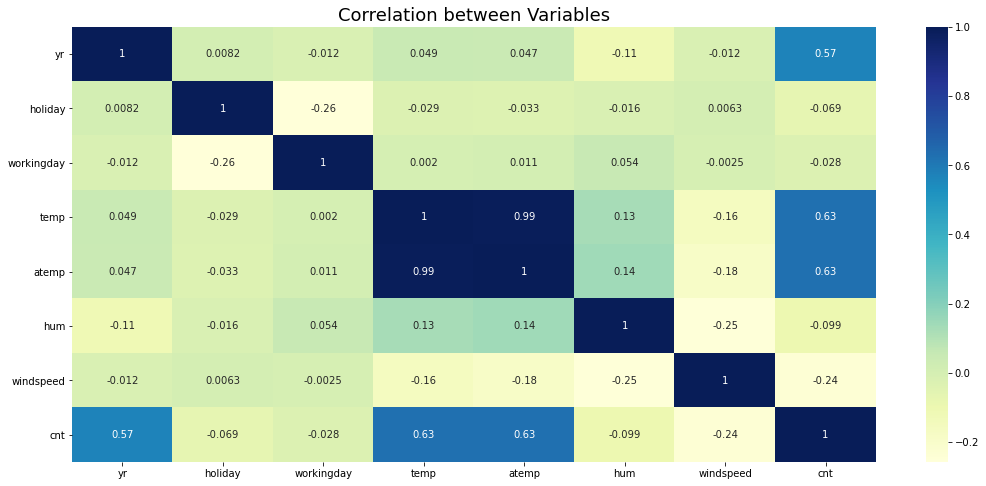

In [32]:
#Heatmap to observe correlation between variables

plt.figure(figsize=[18,8])
plt.title('Correlation between Variables',fontsize=18)
sns.heatmap(bike.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [33]:
'We see year and temperature are closely, positively correlated to count variable'

'We see year and temperature are closely, positively correlated to count variable'

In [34]:
'Also we observe high correlation between temp and atemp variable. we will drop one to avoid any chances of multicollinearity.'

'Also we observe high correlation between temp and atemp variable. we will drop one to avoid any chances of multicollinearity.'

In [35]:
#dropping atemp variable 

bike.drop('atemp',axis=1,inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Data Preparation

#### Creating dummy variables for categorical variables
- season 
- mnth
- weekday
- weathersit

In [36]:
seasons=pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bike.mnth,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather=pd.get_dummies(bike.weathersit,drop_first=True)


In [37]:
#Combining the created dummy variables with the bike dataframe

bike=pd.concat([bike,seasons,months,weekdays,weather],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
#Dropping the columns whose dummy variables were created & concatinated to the bike dataframe

bike.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
bike.shape

(730, 29)

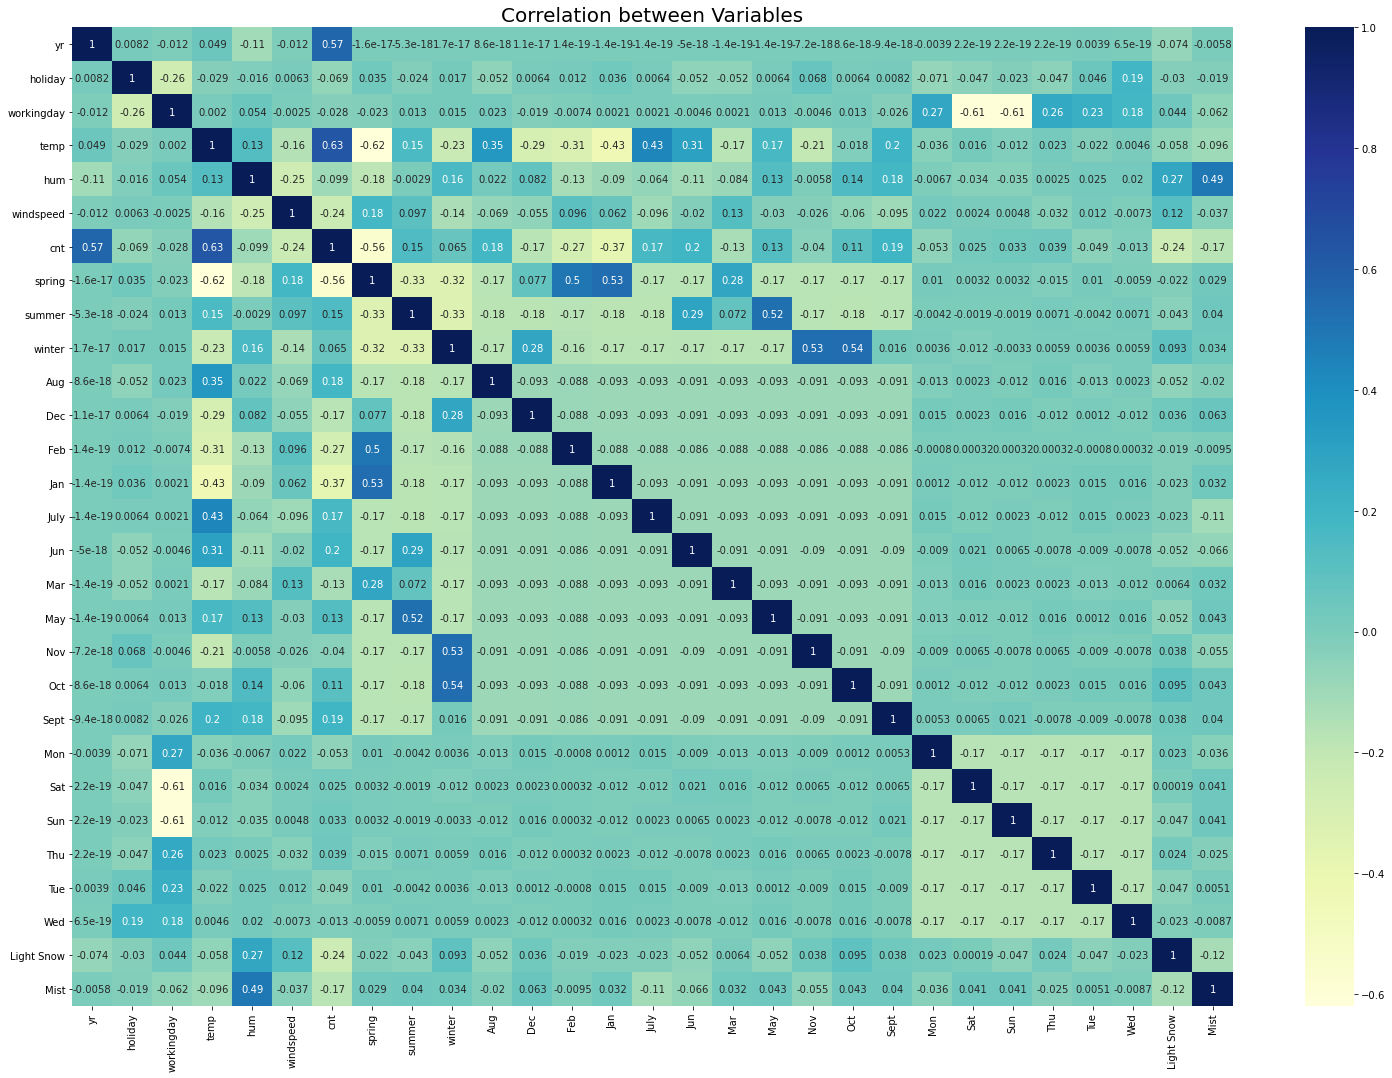

In [40]:
# Checking correlation of the bike dataframe to check the correlation btw all the variables using heatmap

plt.figure(figsize=[26,18])
plt.title('Correlation between Variables',fontsize=20)
sns.heatmap(bike.corr(),annot=True,cmap='YlGnBu')
plt.show()



In [41]:
'We observe somewhat good correlation of Temperature,Year,May,June,July,August,September,October with the target variable count'

'We observe somewhat good correlation of Temperature,Year,May,June,July,August,September,October with the target variable count'

#### Dividing the data into Train & Test sets

In [42]:
#Importing library to perform train test split

import sklearn
from sklearn.model_selection import train_test_split

#now splitting the data into train & test set

bike_train,bike_test=train_test_split(bike,train_size=0.7,random_state=100) 
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


#### Rescaling 

- When different variables are in different scales, our analysis would be improper, maybe also unbiased. So we will perform    scaling so that 
  - Data is easily interpretable
  - Also the optimisation becomes faster when we have smaller values to compute & analyse

- Out of the two major scaling methods, we will go with the MinMax scaling
    - MinMax Scaling
    - Standardisation
    

In [43]:
# We will be scaling using MinMax method.

#Importing libary
from sklearn.preprocessing import MinMaxScaler

#Instantiating an Object
scaler=MinMaxScaler()

#Creating list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Fitting the data
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [44]:
'so now scaling has been sucessfully done and all values lie within the range 0-1'

'so now scaling has been sucessfully done and all values lie within the range 0-1'

#### Dividing data into X and y

In [45]:
y_train = bike_train.pop('cnt')
X_train = bike_train
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 28)


### Data Modeling and Evaluation

- Variable selection is avery crucial part of data modeling. As we have lot of variables to choose from we will adapt a mixed approach to select best variables.
    - We will use RFE, automated approach to select the best specified no of variables to begin with (15 is the number we want to go forward with) 
    - Then we will use backward selection method (dropping one variable at a time) until we have our best fit model.

In [46]:
#Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [47]:
#Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [48]:
#List of variables selected through RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [49]:
'RFE selected features have ranking 1, so we get to see which all features RFE has selected '

'RFE selected features have ranking 1, so we get to see which all features RFE has selected '

In [50]:
#Columns where RFE support is True, and those are the variables we will begin our model with
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'July', 'Nov', 'Sept', 'Light Snow', 'Mist'],
      dtype='object')

#### Building the Model using Statsmodel

In [51]:
#Creating X_test dataframe using RFE selected variables
X_train_rfe= X_train[col]

In [52]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sept,Light Snow,Mist
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [53]:
#importing Libary
import statsmodels.api as sm

#adding constant
X_train_lm=sm.add_constant(X_train_rfe)

#Running the model
lm=sm.OLS(y_train,X_train_lm).fit()

#summary of the created model
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          8.15e-189
Time:                        13:03:13   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
Dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July          -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sept           0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist          -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Checking VIF

#importing Libary to compute vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


In [55]:
'Though the p-values of the variables show them statistically significant, but high VIF value suggest presence of multicollinearity. Hence we will proceed using backward selection method '

'Though the p-values of the variables show them statistically significant, but high VIF value suggest presence of multicollinearity. Hence we will proceed using backward selection method '

##### Rebuilding 2nd model after dropping hum (humidity) variable

In [56]:
#Dropping hum variable
X_train_new1= X_train_rfe.drop(['hum'],axis=1)

In [57]:
#adding constant
X_train_lm1=sm.add_constant(X_train_new1)

#Running the model
lm1=sm.OLS(y_train,X_train_lm1).fit()

#summary of the created model
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          4.75e-186
Time:                        13:03:14   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0349      0.015      2.251      0.025       0.004       0.065
winter         0.0869      0.018      4.831      0.000       0.052       0.122
Dec           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan           -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July          -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sept           0.0687      0.017      4.015      0.000       0.035       0.102
Light Snow    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist          -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,July,1.59
13,Mist,1.57


In [59]:
'Next dropping temp variable as it has high vif and that is what i did at first & the end resultant model was not satisfactory. Also temp variable is somewhat higly correlated with our target variable. So for now we will retain temp variable. and will proceed with dropping windspeed variable'

'Next dropping temp variable as it has high vif and that is what i did at first & the end resultant model was not satisfactory. Also temp variable is somewhat higly correlated with our target variable. So for now we will retain temp variable. and will proceed with dropping windspeed variable'

##### Making 3rd model after dropping windspeed variable

In [60]:
X_train_new1.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,July,Nov,Sept,Light Snow,Mist
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1


In [61]:
#Dropping hum variable
X_train_new2= X_train_new1.drop(['windspeed'],axis=1)

In [62]:
#adding constant
X_train_lm2=sm.add_constant(X_train_new2)

#Running the model
lm2=sm.OLS(y_train,X_train_lm2).fit()

#summary of the created model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          5.35e-179
Time:                        13:03:14   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1837      0.032      5.775      0.000       0.121       0.246
yr             0.2332      0.008     27.496      0.000       0.217       0.250
holiday       -0.0941      0.027     -3.480      0.001      -0.147      -0.041
temp           0.4624      0.037     12.346      0.000       0.389       0.536
spring        -0.0830      0.022     -3.734      0.000      -0.127      -0.039
summer         0.0266      0.016      1.661      0.097      -0.005       0.058
winter         0.0902      0.019      4.834      0.000       0.054       0.127
Dec           -0.0332      0.018     -1.810      0.071      -0.069       0.003
Jan           -0.0333      0.019     -1.765      0.078      -0.070       0.004
July          -0.0512      0.019     -2.663      0.008      -0.089      -0.013
Nov           -0.0415      0.020     -2.091      0.037      -0.081      -0.003
Sept           0.0739      0.018      4.167      0.000       0.039       0.109
Light Snow    -0.3060      0.025    -12.014      0.000      -0.356      -0.256
Mist          -0.0787      0.009     -8.707      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       76.508   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.076
Skew:                          -0.740   Prob(JB):                     1.78e-45
Kurtosis:                       5.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.30
5,winter,2.81
3,spring,2.12
0,yr,2.07
4,summer,1.94
9,Nov,1.79
7,Jan,1.65
8,July,1.59
12,Mist,1.56
6,Dec,1.47


In [64]:
'Now the p-values of Summer, December, January seems to make them insignificant, but we will proceed with removing one variable at a time only'

'Now the p-values of Summer, December, January seems to make them insignificant, but we will proceed with removing one variable at a time only'

##### Rebuilding 4th model after dropping Summer variable

In [65]:
#Dropping Summer variable as it has considerably high p-value
X_train_new3= X_train_new2.drop(['summer'],axis=1)

In [66]:
#adding constant
X_train_lm3=sm.add_constant(X_train_new3)

#Running the model
lm3=sm.OLS(y_train,X_train_lm3).fit()

#summary of the created model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          1.47e-179
Time:                        13:03:15   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2196      0.023      9.390      0.000       0.174       0.266
yr             0.2337      0.008     27.520      0.000       0.217       0.250
holiday       -0.0935      0.027     -3.453      0.001      -0.147      -0.040
temp           0.4335      0.033     13.046      0.000       0.368       0.499
spring        -0.1084      0.016     -6.691      0.000      -0.140      -0.077
winter         0.0710      0.015      4.835      0.000       0.042       0.100
Dec           -0.0387      0.018     -2.139      0.033      -0.074      -0.003
Jan           -0.0381      0.019     -2.035      0.042      -0.075      -0.001
July          -0.0624      0.018     -3.465      0.001      -0.098      -0.027
Nov           -0.0472      0.020     -2.405      0.017      -0.086      -0.009
Sept           0.0621      0.016      3.814      0.000       0.030       0.094
Light Snow    -0.3073      0.026    -12.048      0.000      -0.357      -0.257
Mist          -0.0784      0.009     -8.670      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.191
Skew:                          -0.738   Prob(JB):                     2.53e-48
Kurtosis:                       5.852   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.04
4,winter,2.53
0,yr,2.05
3,spring,1.93
8,Nov,1.79
6,Jan,1.65
11,Mist,1.53
5,Dec,1.46
7,July,1.34
9,Sept,1.20


In [68]:
'Vif values seems to be good. We will next remove Jan variable'

'Vif values seems to be good. We will next remove Jan variable'

##### Rebuilding 5th model after dropping Jan variable

In [69]:
#Dropping Jan variable
X_train_new4= X_train_new3.drop(['Jan'],axis=1)

In [70]:
#adding constant
X_train_lm4=sm.add_constant(X_train_new4)

#Running the model
lm4=sm.OLS(y_train,X_train_lm4).fit()

#summary of the created model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.9
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          7.70e-180
Time:                        13:03:15   Log-Likelihood:                 481.80
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     498   BIC:                            -888.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2081      0.023      9.141      0.000       0.163       0.253
yr             0.2331      0.009     27.382      0.000       0.216       0.250
holiday       -0.0945      0.027     -3.477      0.001      -0.148      -0.041
temp           0.4517      0.032     14.068      0.000       0.389       0.515
spring        -0.1164      0.016     -7.384      0.000      -0.147      -0.085
winter         0.0715      0.015      4.850      0.000       0.043       0.100
Dec           -0.0306      0.018     -1.731      0.084      -0.065       0.004
July          -0.0662      0.018     -3.685      0.000      -0.102      -0.031
Nov           -0.0428      0.020     -2.189      0.029      -0.081      -0.004
Sept           0.0613      0.016      3.759      0.000       0.029       0.093
Light Snow    -0.3044      0.026    -11.918      0.000      -0.355      -0.254
Mist          -0.0792      0.009     -8.738      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       74.104   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.250
Skew:                          -0.705   Prob(JB):                     9.91e-46
Kurtosis:                       5.787   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
4,winter,2.51
0,yr,2.05
7,Nov,1.79
10,Mist,1.51
5,Dec,1.42
6,July,1.33
3,spring,1.29
8,Sept,1.20
9,Light Snow,1.07


In [72]:
'Dec variable has p-value of 0.084 which is considerably high. So lets drop it next'

'Dec variable has p-value of 0.084 which is considerably high. So lets drop it next'

##### Rebuilding 6th model after dropping Dec variable

In [73]:
#Dropping July variable
X_train_new5= X_train_new4.drop(['Dec'],axis=1)

In [74]:
#adding constant
X_train_lm5=sm.add_constant(X_train_new5)

#Running the model
lm5=sm.OLS(y_train,X_train_lm5).fit()

#summary of the created model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.8
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          2.18e-180
Time:                        13:03:16   Log-Likelihood:                 480.27
No. Observations:                 510   AIC:                            -938.5
Df Residuals:                     499   BIC:                            -892.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2000      0.022      8.959      0.000       0.156       0.244
yr             0.2333      0.009     27.350      0.000       0.217       0.250
holiday       -0.0950      0.027     -3.491      0.001      -0.149      -0.042
temp           0.4630      0.032     14.696      0.000       0.401       0.525
spring        -0.1151      0.016     -7.296      0.000      -0.146      -0.084
winter         0.0623      0.014      4.521      0.000       0.035       0.089
July          -0.0681      0.018     -3.787      0.000      -0.103      -0.033
Nov           -0.0303      0.018     -1.665      0.096      -0.066       0.005
Sept           0.0632      0.016      3.874      0.000       0.031       0.095
Light Snow    -0.3010      0.026    -11.796      0.000      -0.351      -0.251
Mist          -0.0788      0.009     -8.673      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       69.791   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.767
Skew:                          -0.680   Prob(JB):                     4.58e-41
Kurtosis:                       5.625   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
4,winter,1.89
6,Nov,1.58
9,Mist,1.51
5,July,1.33
3,spring,1.25
7,Sept,1.20
1,holiday,1.06
8,Light Snow,1.06


In [76]:
'Nov variable has high p-value. So lets drop it next'

'Nov variable has high p-value. So lets drop it next'

##### Rebuilding 7th model after dropping Nov variable

In [77]:
#Dropping Nov variable
X_train_new6= X_train_new5.drop(['Nov'],axis=1)

In [78]:
#adding constant
X_train_lm6=sm.add_constant(X_train_new6)

#Running the model
lm6=sm.OLS(y_train,X_train_lm6).fit()

#summary of the created model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Tue, 14 Sep 2021   Prob (F-statistic):          5.25e-181
Time:                        13:03:16   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     500   BIC:                            -895.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1952      0.022      8.802      0.000       0.152       0.239
yr             0.2332      0.009     27.291      0.000       0.216       0.250
holiday       -0.1006      0.027     -3.716      0.000      -0.154      -0.047
temp           0.4695      0.031     14.995      0.000       0.408       0.531
spring        -0.1122      0.016     -7.143      0.000      -0.143      -0.081
winter         0.0534      0.013      4.197      0.000       0.028       0.078
July          -0.0690      0.018     -3.833      0.000      -0.104      -0.034
Sept           0.0654      0.016      4.015      0.000       0.033       0.097
Light Snow    -0.2993      0.026    -11.717      0.000      -0.349      -0.249
Mist          -0.0781      0.009     -8.594      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       66.632   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.465
Skew:                          -0.661   Prob(JB):                     5.85e-38
Kurtosis:                       5.515   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.99
0,yr,2.05
8,Mist,1.51
4,winter,1.33
5,July,1.33
3,spring,1.25
6,Sept,1.19
7,Light Snow,1.06
1,holiday,1.04


In [80]:
X_train_new6.head()

,yr,holiday,temp,spring,winter,July,Sept,Light Snow,Mist
576,1,0,0.815169,0,0,1,0,0,0
426,1,0,0.442393,1,0,0,0,0,1
728,1,0,0.245101,1,0,0,0,0,0
482,1,0,0.395666,0,0,0,0,0,1
111,0,0,0.345824,0,0,0,0,0,1


##### Final Model outcomes
- We have finally got our best model. The p-values & VIF values are pretty good in numbers.
- Our Final model has 9 variables
- R-squared: 0.822 & Adjusted R-squared:0.819
- p-value indicates that all the variables are significant & vif values suggests no multicollinearity is present

#### Residual Analysis

In [81]:
#y train predicting using final model
y_train_pred = lm6.predict(X_train_lm6)

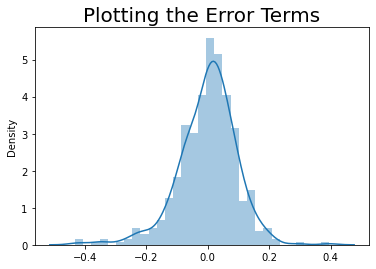

In [82]:
#Error btw predicted and actual value
res=y_train - y_train_pred 

#plotting the error terms
plt.title('Plotting the Error Terms',fontsize=20)
sns.distplot(res)
plt.show()

In [83]:
'The error terms can be seen as normally distributed.'

'The error terms can be seen as normally distributed.'

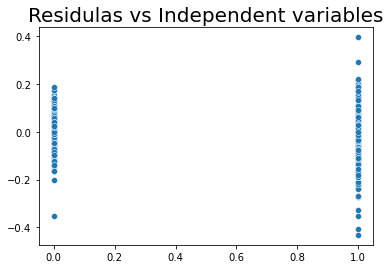

In [84]:
#Checking for any visible pattern between Residuals and Independent variables
Xt=X_train_new6.iloc[:,0].values

plt.title('Residulas vs Independent variables',fontsize=20)
sns.scatterplot(Xt,res)
plt.show()

In [85]:
'We see no pattern between error terms and the Independent variables, which is very good'

'We see no pattern between error terms and the Independent variables, which is very good'

#### Making Predictions

In [86]:
#Performing Scaling on the Test set

#Creating a list of numeric variables
num_vars=['temp','hum','windspeed','cnt']

#Performing scaling on already fit X_train data, so that our test data dosent learn any value & deliver unbiased outcomes
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [87]:
#Dividing into X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,Dec,Feb,Jan,July,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
'we can see that the maximum values of the scaled variables is not exactly equal to 1, which is because we have transformed the test data on already learned X_train data.'

'we can see that the maximum values of the scaled variables is not exactly equal to 1, which is because we have transformed the test data on already learned X_train data.'

- Important step not to skip. The variables that were removed while building the model should also be removed from the test set as well

In [89]:
# Now let's use our final model to make predictions 

# Creating X_test_new dataframe by dropping variables from X_test i.e., the variables which were removed while making model
X_test_new = X_test[X_train_new6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,temp,spring,winter,July,Sept,Light Snow,Mist
184,1.0,0,1,0.831783,0,0,1,0,0,1
535,1.0,1,0,0.901354,0,0,0,0,0,0
299,1.0,0,0,0.511964,0,1,0,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,0,0,0,0,0


In [90]:
#Making predictions
y_pred = lm6.predict(X_test_new)

### Model Evaluation

##### Finding R-squared of the test set

In [91]:
#importing library
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)


0.8096078487662723

In [92]:
X_test.shape


(220, 28)

In [93]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)
#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.809607)*(220-1)/(220-28-1)
print(Adj_r2)

0.7816959842931936


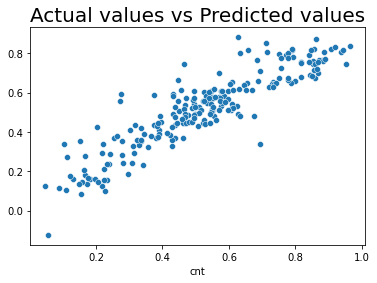

In [94]:
# Plotting y_test and y_pred to understand the spread

plt.title('Actual values vs Predicted values',fontsize=20)
sns.scatterplot(y_test,y_pred)
plt.show()

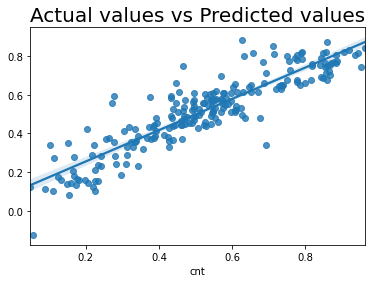

In [95]:
# Plotting y_test and y_pred to understand the spread

plt.title('Actual values vs Predicted values',fontsize=20)
sns.regplot(y_test,y_pred)
plt.show()


We can see that the equation of our best fitted line is:

$ cnt=  0.4695 \times temp+   0.2332 \times yr - 0.1006 \times holiday - 0.1122 \times spring + 0.0534 \times winter 
        - 0.0690 \times July + 0.0654 \times Sept - 0.2993 \times Light snow - 0.0781 \times Mist $

### Final Result Comparision between Train & Test data


   - Train R-squared: 0.822
   - Train Adjusted R-squared: 0.819
   - Test R-squared: 0.809
   - Test Adjusted R-squared: 0.781
   - Difference in R-squared value: 1.3%
   - Difference in Adjusted R-squared value: 3.8%